# Ejercicio 1: Estimación poblacional

Acerca de los archivos donde se encuentra la información: "Censo_edades" contiene la información del censo realizado en 2020, por zonas metropolitanas y sus municipios, además de la población por edades. 
En "base_municipios_final_datos" indica cómo han ido cambiando las poblaciones de hombres y mujeres para diferentes años y en distintos rangos de edad y cómo se espera que sean en un futuro
"Diccionario ZM" indica las zonas metropolitanas, y "NSE" las proporciones de cada nivel socioeconómico para diferentes zonas.


Con base en la información proporcionada (acerca del tamaño de poblaciones de hombres y mujeres en distintas zonas metropolitanas del país, para diferentes años) se busca lo siguiente: 

1. Elige dos zonas metropolitanas (ZM) y un rango de edad de los que están en las bases de datos. 
2. Filtra los datos del inciso 1, de forma que ahora tengas una nueva tabla/dataframe que incluya solamente estos. 
3. Para la nueva tabla que generaste en el inciso 2 (es decir, las zonas metropolitanas y el rango de edad que hayas escogido):  calcula, de la manera que creas más conveniente (y que tenga sentido) la proyección poblacional para los tres siguientes años. Realízalo para hombres, mujeres y para ambos juntos. Incluye, aparte, una proyección para un nivel socioeconómico (NSE) concreto. 
4. Organiza tus resultados en una nueva tabla donde sea visible lo siguiente: la población sobre la que estás calculando la proyección (ZM, edad, género, NSE), los años de proyección y con base en qué se hizo la estimación. 
5. Inventa, simula o crea los datos de una nueva población, es decir: el lugar de residencia (puede ser un lugar ficticio), el rango de edad, el género y los años de los que se tenga información. Sobre estos nuevos datos, realiza la proyección poblacional para los próximos tres años. 

In [180]:
import pandas as pd
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [181]:
ZM = pd.read_csv('C:\CODE\Python\Py_Aleph\data\Problema 1. Tablas Censo 2020 - Proyecciones CONAPO\ZM_21_19.csv', sep=';', encoding='latin1', decimal=',')
puebla = pd.read_csv('C:\CODE\Python\Py_Aleph\data\Problema 1. Tablas Censo 2020 - Proyecciones CONAPO\Puebla.csv', sep=';', encoding='latin1', decimal=',')
monterrey = pd.read_csv('C:\CODE\Python\Py_Aleph\data\Problema 1. Tablas Censo 2020 - Proyecciones CONAPO\Monterrey.csv',sep=';',encoding='latin1',decimal=',')

In [182]:
columnas_seleccionadas = ['Genero', 'NOM_MUN', 'Total2'] + [str(i) for i in range(5)] + ['ZM']
ZM = ZM[columnas_seleccionadas]
ZM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Genero   276 non-null    object
 1   NOM_MUN  276 non-null    object
 2   Total2   276 non-null    object
 3   0        276 non-null    object
 4   1        276 non-null    object
 5   2        276 non-null    object
 6   3        276 non-null    object
 7   4        276 non-null    object
 8   ZM       276 non-null    object
dtypes: object(9)
memory usage: 19.5+ KB


In [183]:
ZM.head()

,Genero,NOM_MUN,Total2,0,1,2,3,4,ZM
0,Total,Abasolo,2.974,62,46,57,46,64,Monterrey
1,Total,Apodaca,656.464,9.335,10.515,10.686,11.117,11.403,Monterrey
2,Total,CadereytaJiménez,122.337,1.513,1.879,1.995,2.134,2.205,Monterrey
3,Total,CiénegadeFlores,68.747,1.495,1.329,1.566,1.571,1.693,Monterrey
4,Total,ElCarmen,104.478,2.283,2.369,2.515,2.923,2.667,Monterrey


## Nota

Escribo esta breve nota para explicar mi punto de vista respecto al ejercicio con los datos proporcionados. Dentro de mis conocimientos, carezco de las herramientas necesarias para ofrecer una respuesta lógica debido a la falta de datos relevantes. Sin embargo, puedo describir cómo abordaría el problema si tuviera acceso a la información necesaria.

En primer lugar, los métodos que podría utilizar son las **Redes Neuronales Convolucionales (CNN)** y los **Modelos de Regresión Lineal Múltiple (RLM)**. Para aplicar un modelo de RLM de manera significativa, necesitaría datos de la evolución de la población durante al menos 5 años hasta 2020. Esto implicaría tener un archivo similar al censo de edades de 2020 para distintos años. Para las CNN, además de esto, necesitaría datos de la evolución de la población durante 8 años: los primeros 5 para el entrenamiento de la red neuronal y los últimos 3 para evaluar su desempeño.

Por otro lado, para proyectar el **NSE (Nivel Socioeconómico)**, carezco de los factores necesarios para asociar una población (municipio) con un NSE específico. Proyectarlo requeriría un análisis geográfico, posiblemente utilizando herramientas como **Geopandas**, o una base de datos que asocie características de la población más allá de la edad. Esto permitiría entrenar modelos de clasificación como **Perceptrón, Máquina de Soporte Vectorial (SVM), Regresión Logística, Árboles de Decisión o K-Means** para obtener una respuesta precisa.

Dado que no tengo acceso a los datos necesarios, puedo proponer un modelo de **Regresión Lineal Simple (RLS)** para aproximar la población de hombres, mujeres y conjunta utilizando las bases de datos de CONAPO. Sin embargo, este enfoque tiene limitaciones y no garantiza la precisión deseada.


In [184]:
puebla = puebla.loc[:,['AÑO', 'SEXO', 'POB']]
sexo_mapping = {'Hombres': 0, 'Mujeres': 1}
puebla['SEXO'] = puebla['SEXO'].map(sexo_mapping)

train = puebla.loc[puebla['AÑO'] <= 2020]
test = puebla.loc[puebla['AÑO'] > 2020]

y_p_train = train['POB']
X_p_train = train.drop(columns='POB', axis=1)
y_p_test = test['POB']
X_p_test = test.drop(columns='POB', axis=1)

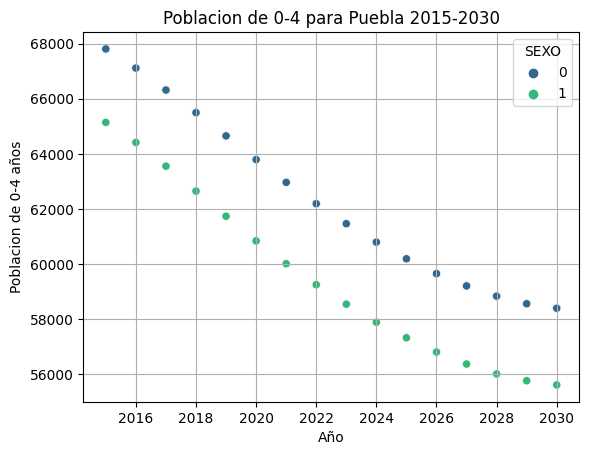

In [185]:
sns.scatterplot(data=puebla, x='AÑO', y='POB', hue='SEXO', palette='viridis')
plt.ylabel('Poblacion de 0-4 años')
plt.xlabel('Año')
plt.title('Poblacion de 0-4 para Puebla 2015-2030')
plt.grid()
plt.show()

### Realizamos la RLS para los datos de entrenamiento

In [186]:
X_p_train = sm.add_constant(X_p_train, prepend=True).rename(columns={'const':'intercept'})
X_p_test = sm.add_constant(X_p_test, prepend=True).rename(columns={'const':'intercept'})
reg = sm.OLS(endog=y_p_train, exog=X_p_train).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                    POB   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     3424.
Date:                Sun, 12 May 2024   Prob (F-statistic):           1.08e-13
Time:                        15:39:19   Log-Likelihood:                -68.466
No. Observations:                  12   AIC:                             142.9
Df Residuals:                       9   BIC:                             144.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.759e+06   2.86e+04     61.420      0.0

c:\Users\diego\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Obtenemos los valores predichos para puebla

In [187]:
y_p_pred = reg.predict(X_p_test)
print(y_p_pred)

6     60120.633333
7     59281.576190
8     58442.519048
9     57603.461905
10    56764.404762
11    55925.347619
12    55086.290476
13    54247.233333
14    53408.176190
15    52569.119048
22    62927.633333
23    62088.576190
24    61249.519048
25    60410.461905
26    59571.404762
27    58732.347619
28    57893.290476
29    57054.233333
30    56215.176190
31    55376.119048
dtype: float64


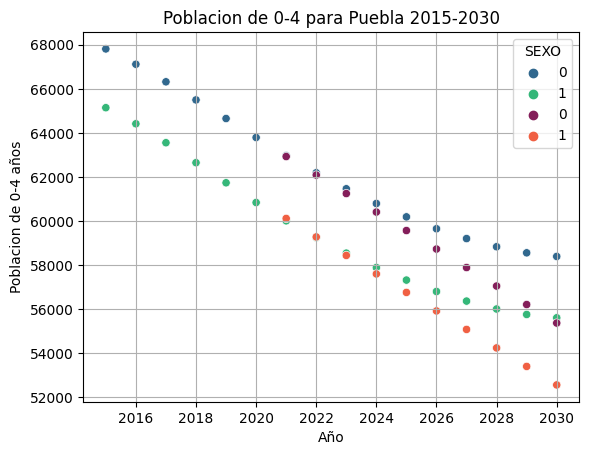

In [188]:
sns.scatterplot(data=puebla, x='AÑO', y='POB', hue='SEXO', palette='viridis')
sns.scatterplot(data = X_p_test, x = 'AÑO', y = y_p_pred, hue='SEXO', palette = 'rocket')
plt.ylabel('Poblacion de 0-4 años')
plt.xlabel('Año')
plt.title('Poblacion de 0-4 para Puebla 2015-2030')
plt.grid()
plt.show()

Como se puede observar en el gráfico, y como se había anticipado, la predicción no coincide exactamente con los datos observados. Los puntos azules y verdes representan la población de hombres y mujeres, respectivamente, según los datos proporcionados por CONAPO, mientras que los puntos morados y naranjas representan la predicción realizada.

En el peor de los casos, hay una diferencia de aproximadamente 2000 niños de 0 a 4 años entre los datos observados y la predicción. Sin embargo, esta discrepancia sigue estando dentro del intervalo de confianza esperado para el modelo.

In [189]:
monterrey = monterrey.loc[:,['AÑO', 'SEXO', 'POB']]
sexo_mapping = {'Hombres': 0, 'Mujeres': 1}
monterrey['SEXO'] = monterrey['SEXO'].map(sexo_mapping)

train = monterrey.loc[monterrey['AÑO'] <= 2020]
test = monterrey.loc[monterrey['AÑO'] > 2020]

y_m_train = train['POB']
X_m_train = train.drop(columns='POB', axis=1)
y_m_test = test['POB']
X_m_test = test.drop(columns='POB', axis=1)

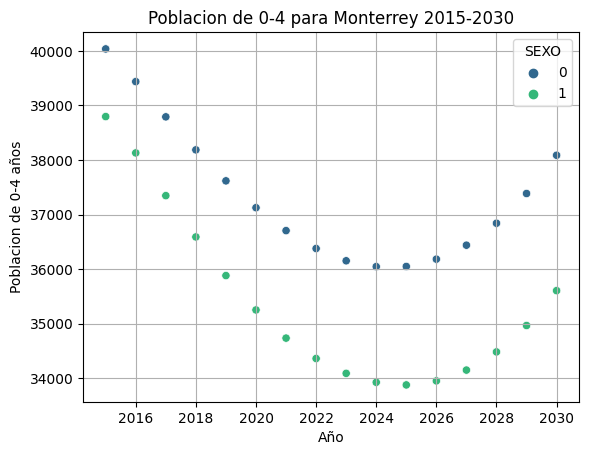

In [190]:
sns.scatterplot(data=monterrey, x='AÑO', y='POB', hue='SEXO', palette='viridis')
plt.ylabel('Poblacion de 0-4 años')
plt.xlabel('Año')
plt.title('Poblacion de 0-4 para Monterrey 2015-2030')
plt.grid()
plt.show()

In [191]:
X_m_train = sm.add_constant(X_m_train, prepend=True).rename(columns={'const':'intercept'})
X_m_test = sm.add_constant(X_m_test, prepend=True).rename(columns={'const':'intercept'})
reg = sm.OLS(endog=y_m_train, exog=X_m_train).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                    POB   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     577.7
Date:                Sun, 12 May 2024   Prob (F-statistic):           3.14e-10
Time:                        15:39:20   Log-Likelihood:                -74.442
No. Observations:                  12   AIC:                             154.9
Df Residuals:                       9   BIC:                             156.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    1.36e+06   4.71e+04     28.856      0.0

c:\Users\diego\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [192]:
y_m_pred = reg.predict(X_m_test)
print(y_m_pred)

6     34706.850000
7     34052.092857
8     33397.335714
9     32742.578571
10    32087.821429
11    31433.064286
12    30778.307143
13    30123.550000
14    29468.792857
15    28814.035714
22    36239.683333
23    35584.926190
24    34930.169048
25    34275.411905
26    33620.654762
27    32965.897619
28    32311.140476
29    31656.383333
30    31001.626190
31    30346.869048
dtype: float64


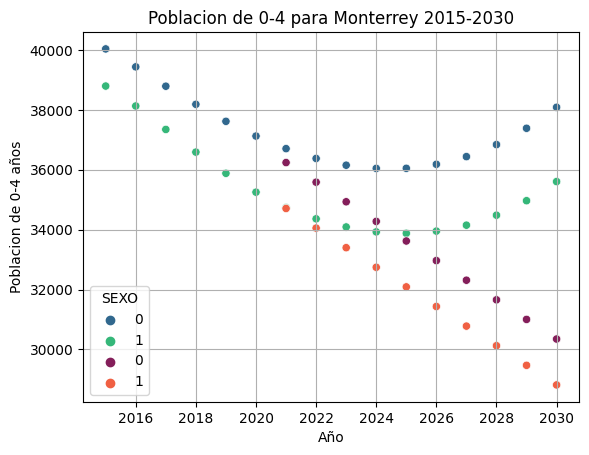

In [193]:
sns.scatterplot(data=monterrey, x='AÑO', y='POB', hue='SEXO', palette='viridis')
sns.scatterplot(data = X_m_test, x = 'AÑO', y = y_m_pred, hue='SEXO', palette = 'rocket')
plt.ylabel('Poblacion de 0-4 años')
plt.xlabel('Año')
plt.title('Poblacion de 0-4 para Monterrey 2015-2030')
plt.grid()
plt.show()

Es evidente que la línea recta proporcionada por el modelo de regresión lineal simple no se ajusta adecuadamente a los datos obtenidos por CONAPO. La naturaleza de los datos parece ser poco lineal, lo que limita la capacidad del modelo para capturar la complejidad de la relación entre las variables.

En lugar de confiar en un modelo lineal, sería más apropiado explorar enfoques más flexibles que permitan ajustes polinomiales para capturar mejor la relación no lineal entre las variables. Un enfoque prometedor podría ser el uso de redes neuronales, que son capaces de aprender representaciones complejas y no lineales de los datos.